In [ ]:
from google.colab import drive
import os
import sys
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/A4')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# !ls
data_dir = './'
train_file = os.path.join(data_dir, 'train.csv')
test_file = os.path.join(data_dir, 'test.csv')

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

print(train_df.info())
print(test_df.info())

print(train_df.describe())
print(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Columns: 30002 entries, 0 to Label
dtypes: float64(30000), int64(2)
memory usage: 936.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Columns: 30001 entries, 0 to ID
dtypes: float64(30000), int64(1)
memory usage: 401.2 MB
None
                 0            1            2            3            4  \
count  4089.000000  4089.000000  4089.000000  4089.000000  4089.000000   
mean      0.010625    -0.012287     0.013083    -0.001755     0.002186   
std       0.031617     0.050303     0.032681     0.041229     0.045339   
min      -0.158230    -0.292890    -0.159740    -0.130070    -0.249800   
25%       0.000000    -0.023702     0.000000    -0.016218    -0.014059   
50%       0.009602     0.000000     0.014258     0.000000     0.000000   
75%       0.024249     0.004823     0.022205     0.011867     0.019167   
max       0.269630     0.201390     0.271560     0.210190     0.190860 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
import os
import sys
# !ls
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/A4')
data_dir = './'
train_file = os.path.join(data_dir, 'train.csv')
test_file = os.path.join(data_dir, 'test.csv')

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)


Mounted at /content/drive


In [ ]:
# train_df.head()
# print(train_df.describe())

In [ ]:
# test_df.head()
# print(test_df.describe())

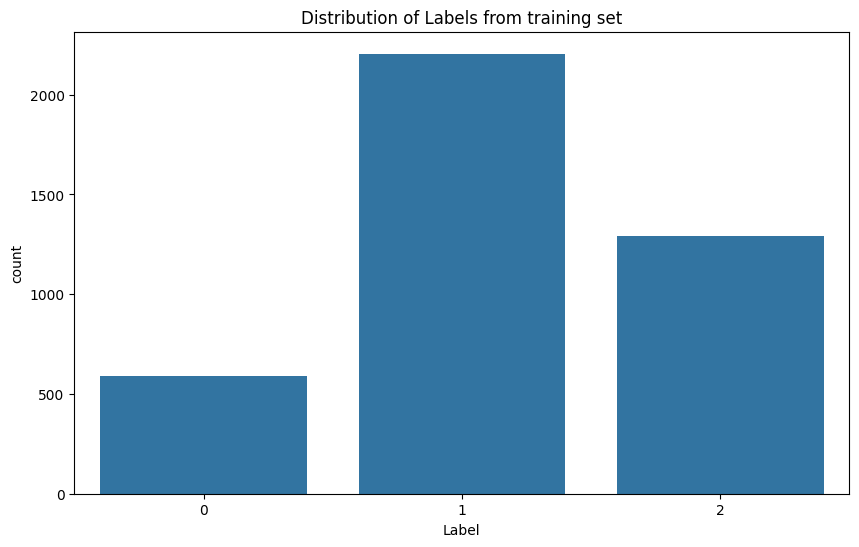

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='Label',data=train_df)
plt.title('Distribution of Labels from training set')
plt.show()

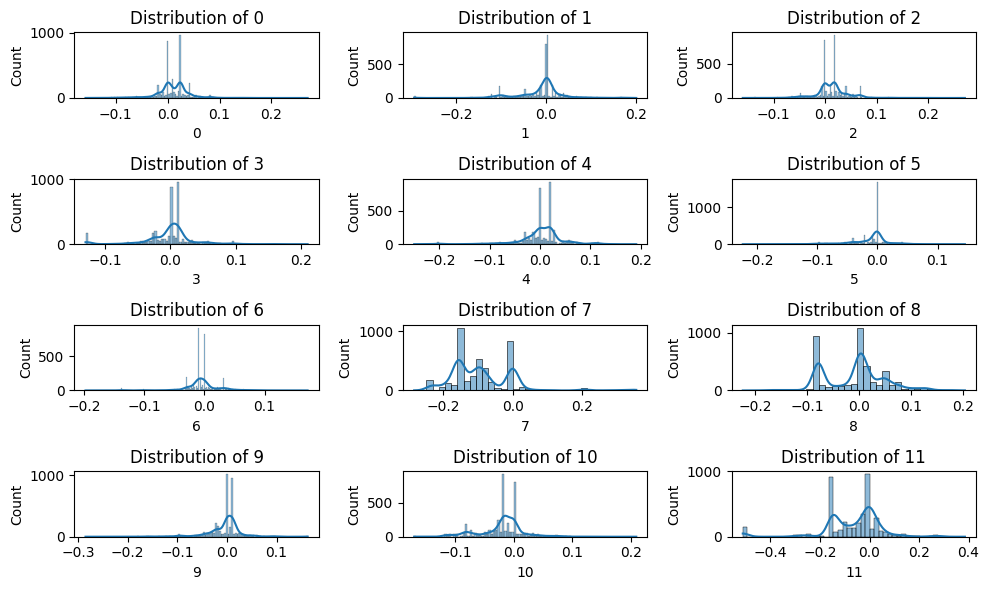

In [ ]:
features = train_df.columns[:-2]
plt.figure(figsize=(10,6))
# sns.heatmap(train_df[features].corr(),annot=True)

# Plot the first 12 features for brevity
for i, feature in enumerate(features[:12]):
    plt.subplot(4, 3, i+1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### Virtualize data

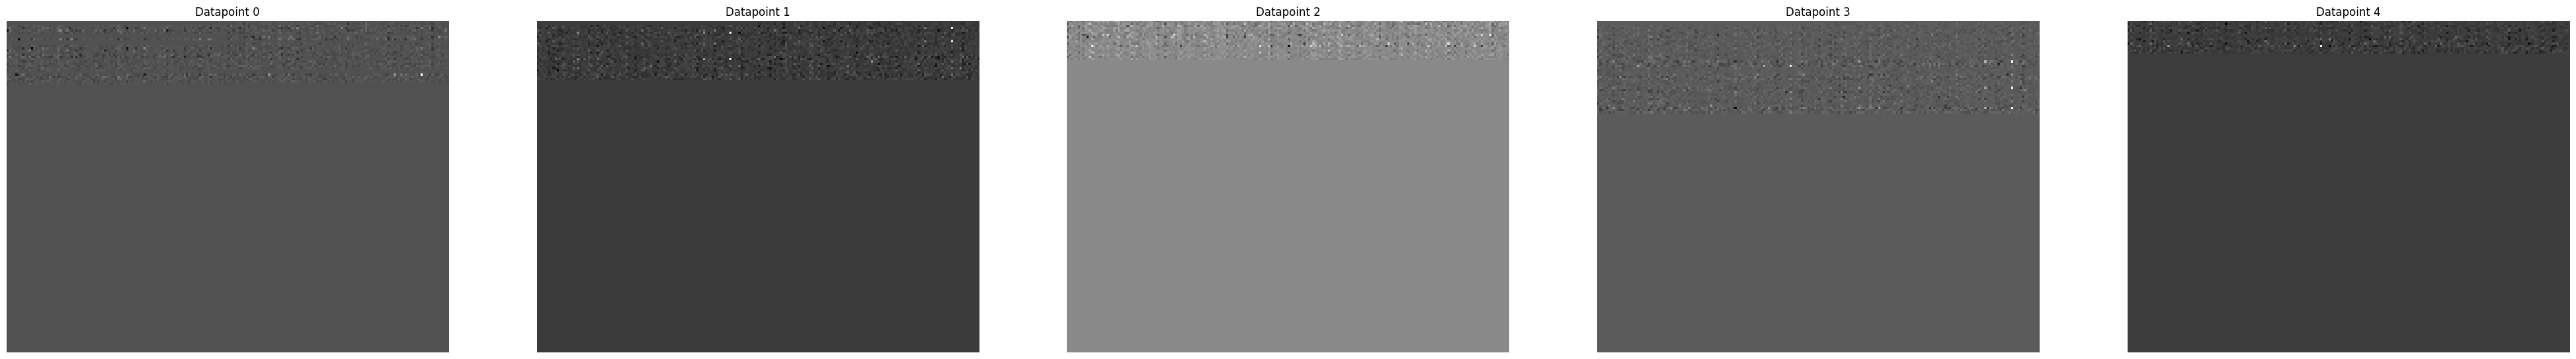

In [ ]:
IMG_SHAPE1 = 150
IMG_SHAPE2 = 200

test_features = test_df.drop(columns=['ID']).values
features = train_df.drop(columns=['ID', 'Label']).values
number_of_train_data_points = features.shape[0]
number_of_test_data_points = test_features.shape[0]
reshaped_features = features.reshape(number_of_train_data_points, IMG_SHAPE1, IMG_SHAPE2, 1)
reshaped_test = test_features.reshape(number_of_test_data_points, IMG_SHAPE1, IMG_SHAPE2, 1)


num_images_to_plot=5
plt.figure(figsize=(50, 50))
for i in range(num_images_to_plot):
  img = reshaped_features[i,:]

  plt.subplot(1, num_images_to_plot, i+1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title(f'Datapoint {i}')
plt.show()

## Normal workflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.decomposition import PCA

# Prepare the data
X_train_full = train_df.drop(columns=['ID', 'Label']).values
y_train_full = train_df['Label'].values
X_test_full = test_df.drop('ID', axis=1).values

# Standardize the data
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Apply PCA
# 1075 keep 90% variance
pca = PCA(n_components=1075)
X_train_pca = pca.fit_transform(X_train_full)
X_test_pca = pca.transform(X_test_full)

# X_train_pca = X_train_full
# X_test_pca = X_test_full


# Split the data into training and validation sets
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_train_pca, y_train_full, test_size=0.2, random_state=42)

# Convert to TensorFlow datasets
# Simulate as dataloader from Pytorch
train_dataset_pca = tf.data.Dataset.from_tensor_slices((X_train_pca, y_train)).batch(32).shuffle(buffer_size=1024)
val_dataset_pca = tf.data.Dataset.from_tensor_slices((X_val_pca, y_val)).batch(32)

## Define function to efficiently create models


In [7]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
def create_model(model_type, input_dim, output_dim):
    if model_type == 'cnn':
        model = Sequential([
            tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            Conv1D(32, 3, activation='relu'),
            MaxPooling1D(2),
            Conv1D(64, 3, activation='relu'),
            MaxPooling1D(2),
            tf.keras.layers.Flatten(),
            Dense(64, activation='relu'),
            Dense(output_dim, activation='softmax')
        ])
    elif model_type == 'rnn':
        model = Sequential([
            tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            SimpleRNN(64, activation='relu'),
            Dense(64, activation='relu'),
            Dense(output_dim, activation='softmax')
        ])
    elif model_type == 'lstm':
        model = Sequential([
            tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            LSTM(64, activation='relu'),
            Dense(64, activation='relu'),
            Dense(output_dim, activation='softmax')
        ])
    elif model_type == 'gru':
        model = Sequential([
            tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            GRU(64, activation='relu'),
            Dense(64, activation='relu'),
            Dense(output_dim, activation='softmax')
        ])
    elif model_type == 'dense':
        model = Sequential([
            Dense(128, activation='relu', input_shape=(input_dim,)),
            BatchNormalization(),
            Dropout(0.5),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(output_dim, activation='softmax')
        ])

    model.compile(optimizer=Adam(0.001),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=[SparseCategoricalAccuracy()])

    return model


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Function to plot training and validation history
def plot_history(history, title):
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.plot(history['sparse_categorical_accuracy'], label='Train Accuracy')
    plt.plot(history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [ ]:
def train_and_save_model(model_type, input_dim, output_dim, train_dataset, val_dataset, epochs=100):
    model = create_model(model_type, input_dim, output_dim)
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
    model.save(f'{model_type}_model.h5')
    np.save(f'{model_type}_history.npy', history.history)


In [ ]:
input_dim = X_train_pca.shape[1]
output_dim = len(set(y_train_full))

In [ ]:
train_and_save_model('cnn', input_dim, output_dim, train_dataset_pca, val_dataset_pca)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 1.6882 - sparse_categorical_accuracy: 0.4982 - val_loss: 0.9581 - val_sparse_categorical_accuracy: 0.5513
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.9479 - sparse_categorical_accuracy: 0.5360 - val_loss: 0.9508 - val_sparse_categorical_accuracy: 0.5587
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8290 - sparse_categorical_accuracy: 0.6268 - val_loss: 0.9315 - val_sparse_categorical_accuracy: 0.5966
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6776 - sparse_categorical_accuracy: 0.7309 - val_loss: 0.9762 - val_sparse_categorical_accuracy: 0.5685
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5289 - sparse_categorical_accuracy: 0.8000 - val_loss: 1.0293 - val_sparse_categorical_accuracy: 0.5733
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4364 - sparse_categorical_accuracy: 0.8516 - val_loss: 1.1711 - val_sparse_categorical_accuracy: 0.5782
Epoch 7/1

In [ ]:
train_and_save_model('rnn', input_dim, output_dim, train_dataset_pca, val_dataset_pca)


Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 28s 246ms/step - loss: 1.0505 - sparse_categorical_accuracy: 0.4462 - val_loss: 0.9548 - val_sparse_categorical_accuracy: 0.5550
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - loss: 0.9768 - sparse_categorical_accuracy: 0.5403 - val_loss: 0.9566 - val_sparse_categorical_accuracy: 0.5562
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - loss: 0.9760 - sparse_categorical_accuracy: 0.5242 - val_loss: 0.9569 - val_sparse_categorical_accuracy: 0.5562
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - loss: 0.9693 - sparse_categorical_accuracy: 0.5434 - val_loss: 0.9605 - val_sparse_categorical_accuracy: 0.5538
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - loss: 0.9715 - sparse_categorical_accuracy: 0.5363 - val_loss: 0.9608 - val_sparse_categorical_accuracy: 0.5526
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - loss: 0.9743 - sparse_categorical_accuracy: 0.5279 - val_loss: 0.9647 - val_sparse_categoric

In [ ]:

train_and_save_model('lstm', input_dim, output_dim, train_dataset_pca, val_dataset_pca)


Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - loss: nan - sparse_categorical_accuracy: 0.3493 - val_loss: nan - val_sparse_categorical_accuracy: 0.3178
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - loss: nan - sparse_categorical_accuracy: 0.3045 - val_loss: nan - val_sparse_categorical_accuracy: 0.3178
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - loss: nan - sparse_categorical_accuracy: 0.3271 - val_loss: nan - val_sparse_categorical_accuracy: 0.3178
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - loss: nan - sparse_categorical_accuracy: 0.3210 - val_loss: nan - val_sparse_categorical_accuracy: 0.3178
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - loss: nan - sparse_categorical_accuracy: 0.3152 - val_loss: nan - val_sparse_categorical_accuracy: 0.3178
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - loss: nan - sparse_categorical_accuracy: 0.3197 - val_loss: nan - val_sparse_categorical_accuracy: 0.3178
Epoch 7/100
103/

In [ ]:
train_and_save_model('gru', input_dim, output_dim, train_dataset_pca, val_dataset_pca)


Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - loss: 1.0457 - sparse_categorical_accuracy: 0.5220 - val_loss: 0.9490 - val_sparse_categorical_accuracy: 0.5562
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.9828 - sparse_categorical_accuracy: 0.5403 - val_loss: 0.9581 - val_sparse_categorical_accuracy: 0.5562
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - loss: 1.0012 - sparse_categorical_accuracy: 0.5412 - val_loss: 0.9504 - val_sparse_categorical_accuracy: 0.5562
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - loss: 0.9815 - sparse_categorical_accuracy: 0.5329 - val_loss: 0.9522 - val_sparse_categorical_accuracy: 0.5562
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - loss: 0.9805 - sparse_categorical_accuracy: 0.5292 - val_loss: 0.9510 - val_sparse_categorical_accuracy: 0.5562
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 0.9799 - sparse_categorical_accuracy: 0.5307 - val_loss: 0.9528 - val_sparse_categoric

In [ ]:
train_and_save_model('dense', input_dim, output_dim, train_dataset_pca, val_dataset_pca)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 1.6949 - sparse_categorical_accuracy: 0.3588 - val_loss: 1.0396 - val_sparse_categorical_accuracy: 0.5367
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1033 - sparse_categorical_accuracy: 0.5370 - val_loss: 0.9662 - val_sparse_categorical_accuracy: 0.5709
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9257 - sparse_categorical_accuracy: 0.6069 - val_loss: 0.9285 - val_sparse_categorical_accuracy: 0.5868
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8546 - sparse_categorical_accuracy: 0.6269 - val_loss: 0.9227 - val_sparse_categorical_accuracy: 0.6027
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7923 - sparse_categorical_accuracy: 0.6462 - val_loss: 0.9055 - val_sparse_categorical_accuracy: 0.6088
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7417 - sparse_categorical_accuracy: 0.6895 - val_loss: 0.9043 - val_sparse_categorical_accuracy: 0.6088
Epoch 7/1

## PLAY AROUND OTHER MODEL LAYERS

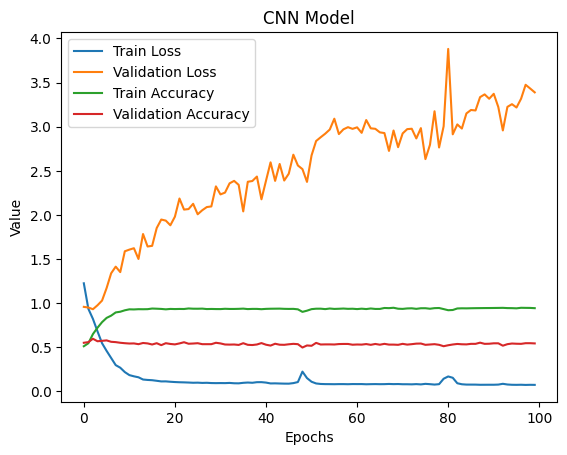

In [ ]:
# Load and plot CNN model history
cnn_history = np.load('cnn_history.npy', allow_pickle=True).item()
plot_history(cnn_history, 'CNN Model')

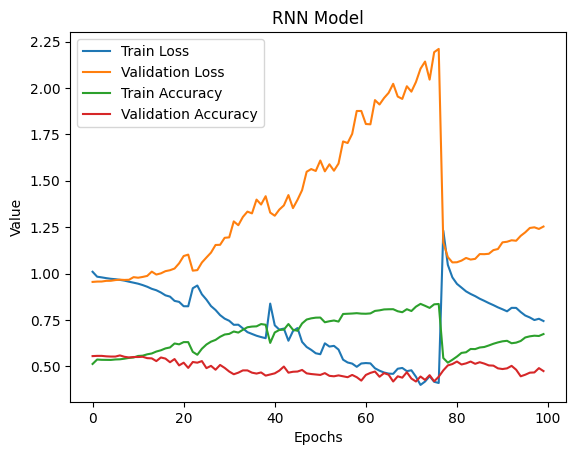

In [ ]:
# Load and plot RNN model history
rnn_history = np.load('rnn_history.npy', allow_pickle=True).item()
plot_history(rnn_history, 'RNN Model')


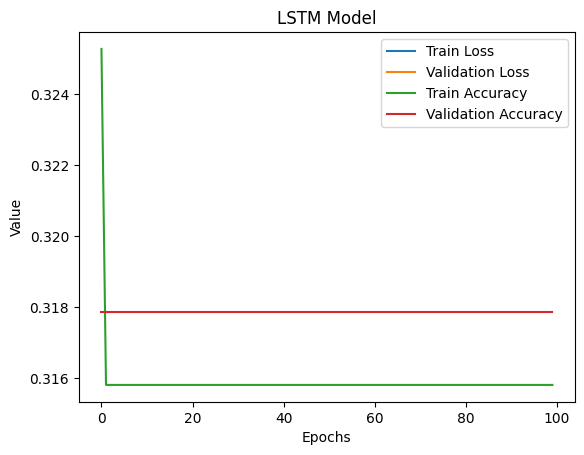

In [ ]:
# Load and plot LSTM model history
lstm_history = np.load('lstm_history.npy', allow_pickle=True).item()
plot_history(lstm_history, 'LSTM Model')


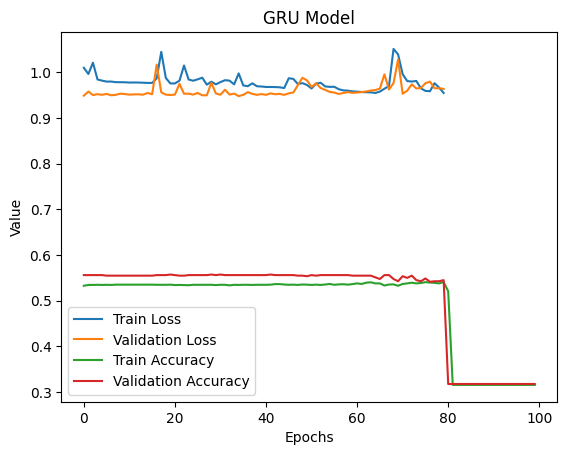

In [ ]:
# Load and plot GRU model history
gru_history = np.load('gru_history.npy', allow_pickle=True).item()
plot_history(gru_history, 'GRU Model')

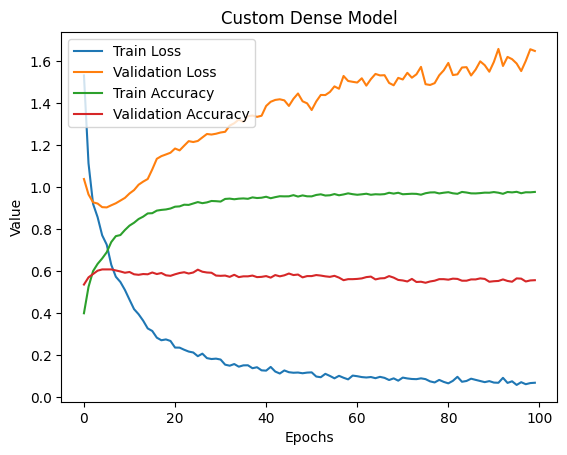

In [ ]:
# Load and plot Dense model history
dense_history = np.load('dense_history.npy', allow_pickle=True).item()
plot_history(dense_history, 'Custom Dense Model')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Prepare the data
X_train_full = train_df.drop(columns=['ID', 'Label']).values
y_train_full = train_df['Label'].values
X_test_full = test_df.drop('ID', axis=1).values


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_full, test_size=0.2, random_state=42)

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(buffer_size=1024)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

# Function to create and compile model
def create_dense_model(input_dim, hidden_layers, hidden_nodes, output_dim):
    model = Sequential()
    model.add(Dense(hidden_nodes, activation='relu', input_shape=(input_dim,)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(optimizer=Adam(0.001),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=[SparseCategoricalAccuracy()])

    return model

# Function to train model and save history
def train_and_save_model(model_name, input_dim, hidden_layers, hidden_nodes, output_dim, train_dataset, val_dataset, epochs=100):
    model = create_dense_model(input_dim, hidden_layers, hidden_nodes, output_dim)
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
    model.save(f'{model_name}.h5')
    np.save(f'{model_name}_history.npy', history.history)

# Define input and output dimensions
input_dim = X_train.shape[1]
output_dim = len(set(y_train_full))



In [ ]:
train_and_save_model('dense_model_1layer_64nodes', input_dim, 1, 64, output_dim, train_dataset, val_dataset)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 8.3561 - sparse_categorical_accuracy: 0.4919 - val_loss: 1.4351 - val_sparse_categorical_accuracy: 0.5306
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.9579 - sparse_categorical_accuracy: 0.7856 - val_loss: 1.6665 - val_sparse_categorical_accuracy: 0.5733
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5053 - sparse_categorical_accuracy: 0.8778 - val_loss: 1.7376 - val_sparse_categorical_accuracy: 0.5819
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3095 - sparse_categorical_accuracy: 0.9179 - val_loss: 1.9156 - val_sparse_categorical_accuracy: 0.5880
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3942 - sparse_categorical_accuracy: 0.9119 - val_loss: 1.9107 - val_sparse_categorical_accuracy: 0.5782
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3805 - sparse_categorical_accuracy: 0.9251 - val_loss: 2.0090 - val_sparse_categorical_accuracy: 0.5880
Epoch 7/1

In [4]:
train_and_save_model('dense_model_2layers_32nodes', input_dim, 2, 32, output_dim, train_dataset, val_dataset)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 5.5455 - sparse_categorical_accuracy: 0.5215 - val_loss: 1.1123 - val_sparse_categorical_accuracy: 0.5672
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7376 - sparse_categorical_accuracy: 0.7749 - val_loss: 1.0718 - val_sparse_categorical_accuracy: 0.6100
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4111 - sparse_categorical_accuracy: 0.8734 - val_loss: 1.1961 - val_sparse_categorical_accuracy: 0.5892
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2510 - sparse_categorical_accuracy: 0.9185 - val_loss: 1.1995 - val_sparse_categorical_accuracy: 0.6015
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2143 - sparse_categorical_accuracy: 0.9292 - val_loss: 1.2985 - val_sparse_categorical_accuracy: 0.5929
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1737 - sparse_categorical_accuracy: 0.9337 - val_loss: 1.3093 - val_sparse_categorical_accuracy: 0.6125
Epoc

In [4]:
train_and_save_model('dense_model_2layers_64nodes', input_dim, 2, 64, output_dim, train_dataset, val_dataset)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 1.4105 - sparse_categorical_accuracy: 0.5494 - val_loss: 1.0891 - val_sparse_categorical_accuracy: 0.6002
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.5679 - sparse_categorical_accuracy: 0.8011 - val_loss: 1.2424 - val_sparse_categorical_accuracy: 0.5636
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4764 - sparse_categorical_accuracy: 0.8853 - val_loss: 1.2121 - val_sparse_categorical_accuracy: 0.5892
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2758 - sparse_categorical_accuracy: 0.9154 - val_loss: 1.3361 - val_sparse_categorical_accuracy: 0.5782
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2900 - sparse_categorical_accuracy: 0.9268 - val_loss: 1.3577 - val_sparse_categorical_accuracy: 0.5770
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.2247 - sparse_categorical_accuracy: 0.9231 - val_loss: 1.4004 - val_sparse_categorical_accuracy: 0.5795
Epoc

In [5]:
def plot_history(history, title):
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.plot(history['sparse_categorical_accuracy'], label='Train Accuracy')
    plt.plot(history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

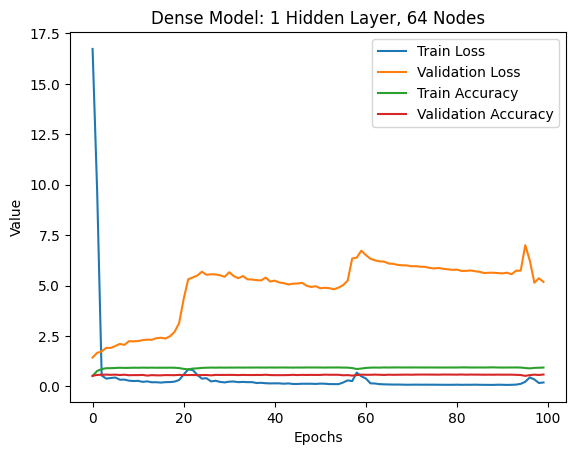

In [6]:
# Load and plot history for model with 1 hidden layer and 64 nodes
history_1layer_64nodes = np.load('dense_model_1layer_64nodes_history.npy', allow_pickle=True).item()
plot_history(history_1layer_64nodes, 'Dense Model: 1 Hidden Layer, 64 Nodes')


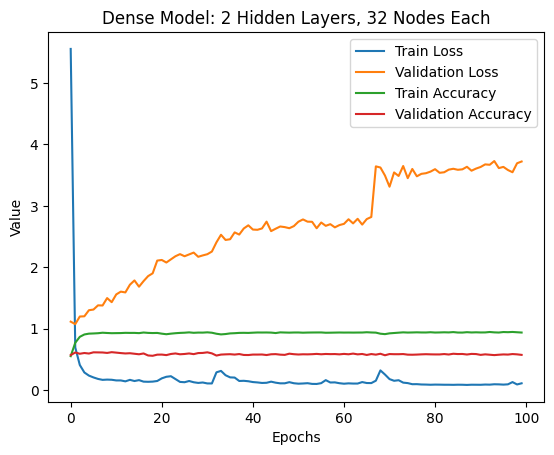

In [7]:
# Load and plot history for model with 2 hidden layers and 32 nodes each
history_2layers_32nodes = np.load('dense_model_2layers_32nodes_history.npy', allow_pickle=True).item()
plot_history(history_2layers_32nodes, 'Dense Model: 2 Hidden Layers, 32 Nodes Each')


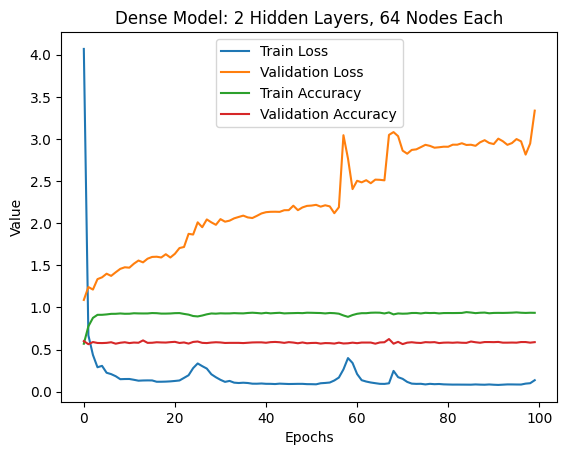

In [8]:
# Load and plot history for model with 2 hidden layers and 64 nodes each
history_2layers_64nodes = np.load('dense_model_2layers_64nodes_history.npy', allow_pickle=True).item()
plot_history(history_2layers_64nodes, 'Dense Model: 2 Hidden Layers, 64 Nodes Each')

**Model 1: 1 Hidden Layer, 64 Nodes**
Training Loss & Accuracy: The training loss decreases quickly and stabilizes at a low value, with high and stable training accuracy.

Validation Loss & Accuracy: The validation loss is higher and more fluctuating than the training loss, indicating some instability and potential overfitting.
Generalization: Shows signs of overfitting, with validation performance not as strong as training performance.

**Model 2: 2 Hidden Layers, 32 Nodes Each**
Training Loss & Accuracy: Stable training performance with low training loss and high accuracy.

Validation Loss & Accuracy: Validation loss increases and fluctuates, with lower and more unstable validation accuracy, suggesting overfitting.
Generalization: Poor generalization due to increased model complexity capturing noise.

**Model 3: 2 Hidden Layers, 64 Nodes Each**
Training Loss & Accuracy: Similar to the other models, with low training loss and high accuracy.
Validation Loss & Accuracy: Validation loss fluctuates significantly with an increasing trend, and validation accuracy is lower and unstable.

In conclusion, it seems to me all models show signs of overfitting, with the 1 hidden layer, 64 nodes model being slightly more stable in validation performance compared to the others.

### Compare and Analyze the results



### Advanced Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Function to create and compile the advanced model
def build_advanced_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.001)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(3, activation='softmax')  # Use softmax for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define input and output dimensions
input_dim = X_train.shape[1]
output_dim = len(set(y_train_full))

# Train the advanced model and save history
advanced_model = build_advanced_model(input_dim)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = advanced_model.fit(train_dataset, validation_data=val_dataset, epochs=100,callbacks=[early_stopping])
advanced_model.save('advanced_model.h5')
np.save('advanced_model_history.npy', history.history)

# Evaluate the model
y_val_pred = np.argmax(advanced_model.predict(X_val), axis=1)
print(classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1', 'Class 2']))
print(f"F1 Score: {f1_score(y_val, y_val_pred, average='weighted'):.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.4959 - loss: 1.7811 - val_accuracy: 0.6015 - val_loss: 1.2111
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8486 - loss: 1.6184 - val_accuracy: 0.6088 - val_loss: 1.2206
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9094 - loss: 0.6038 - val_accuracy: 0.6015 - val_loss: 1.2503
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9321 - loss: 0.5157 - val_accuracy: 0.6149 - val_loss: 1.2995
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9346 - loss: 0.4393 - val_accuracy: 0.5954 - val_loss: 1.3139
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9303 - loss: 0.4251 - val_accuracy: 0.6002 - val_loss: 1.3444
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9328 - loss: 0.3930 - val_accuracy: 0.6088 - val_loss: 1.3792
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9323 - loss: 0.3819 - val_accuracy: 0.596

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

     Class 0       0.18      0.12      0.14       103
     Class 1       0.67      0.77      0.72       455
     Class 2       0.56      0.50      0.53       260

    accuracy                           0.60       818
   macro avg       0.47      0.46      0.46       818
weighted avg       0.57      0.60      0.58       818

F1 Score: 0.5846


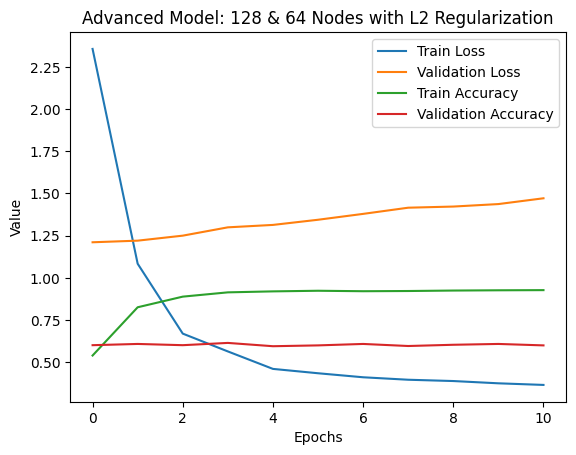

In [10]:
def plot_history(history, title):
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Load and plot history for the advanced model
advanced_history = np.load('advanced_model_history.npy', allow_pickle=True).item()
plot_history(advanced_history, 'Advanced Model: 128 & 64 Nodes with L2 Regularization')

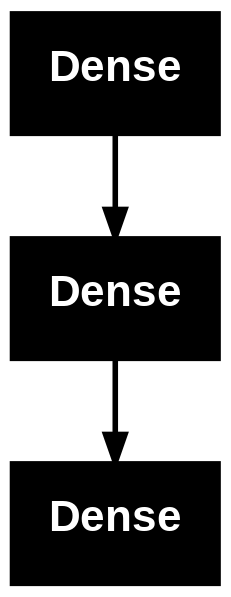

In [12]:
tf.keras.utils.plot_model(advanced_model)


In [13]:
advanced_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       3,840,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,545,739 (44.04 MB)

 Trainable params: 3,848,579 (14.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,697,160 (29.36 MB)

### To improve the model if more time, money, and resources were available, the following steps could be taken:

* We also tried apply PCA to reduce dimension while find out number of princinple components to keep 90% variance
* Since the class are imbalance, we can apply SMOTE to generate synthetic data for training regression model. I already tried KNN, we can advanced based on major votes mechanism (for example 3 class labels, we will use 4 fold-cross validation to classify to make sure 1 class will be major)
* Ensemble Methods, which we already tried have improve the accuracy of test set by combine multiple models (e.g., ensemble of neural networks, Random Forests) to improve overall performance.
* If we more resources, we can use High-Performance Computing which utilize GPU/TPU resources for faster training and the ability to train more complex models.



### Function to evaluate models